# Analysis of the Physical Activity Patterns for a Subject in the "Highly Active" Group
Among the 183 subjects, we classified them into three categories based on their daily average steps:
* Inactive: daily average about 1 step.
* Moderately Active: daily average about 4 steps.
* Highly Active: daily average between 7-9 steps

In this notebook, we analyze the activity patterns for a subject in the "Highly Active" category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9
import datetime as datetime
from dateutil.parser import parse

## Load and Parse the data into Time Series
The individual subjects data have been extracted and stored in a separated folder. This subject data is stored in a file "high1.csv".

In [2]:
dateparse = lambda d: parse(d)
df = pd.read_csv("patients_data/analyses/high1.csv", parse_dates = \
                 ['Datetime'], index_col = "Datetime", date_parser=dateparse)

### What are the unique dates in this subject's timeline? 

In [3]:
np.unique(df.index.date)

array([datetime.date(2016, 3, 29), datetime.date(2016, 3, 30),
       datetime.date(2016, 3, 31), datetime.date(2016, 4, 1),
       datetime.date(2016, 4, 2), datetime.date(2016, 4, 3),
       datetime.date(2016, 4, 4), datetime.date(2016, 4, 5),
       datetime.date(2016, 4, 6), datetime.date(2016, 4, 7),
       datetime.date(2016, 4, 8), datetime.date(2016, 4, 9),
       datetime.date(2016, 4, 10), datetime.date(2016, 4, 11),
       datetime.date(2016, 4, 12), datetime.date(2016, 4, 13),
       datetime.date(2016, 4, 14), datetime.date(2016, 4, 15),
       datetime.date(2016, 4, 16), datetime.date(2016, 4, 17),
       datetime.date(2016, 4, 18), datetime.date(2016, 4, 19),
       datetime.date(2016, 4, 20), datetime.date(2016, 4, 21)],
      dtype=object)

### What is the earlist time and latest time in the timeline?

In [4]:
print(np.min(df.index))
print ('-' * 10)
print(np.max(df.index))

2016-03-29 11:15:00
----------
2016-04-21 12:42:00


### How many records in total for this patient?

In [5]:
df = df.iloc[:, 2:]
df.shape

(33205, 15)

### In terms of steps, how do the minute-by-minute activties and daily average activities look like?

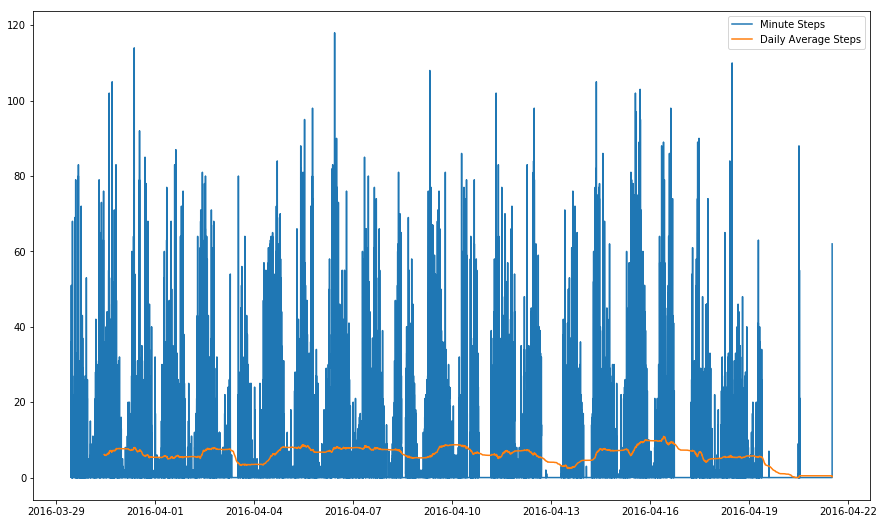

In [6]:
plt.figure(figsize = (15, 9))
plt.plot(df['Steps'], label = "Minute Steps")
plt.plot(df['Steps'].rolling(1440).mean(), label = "Daily Average Steps")
plt.legend(loc='best')

### How do the hourly average activities look like?

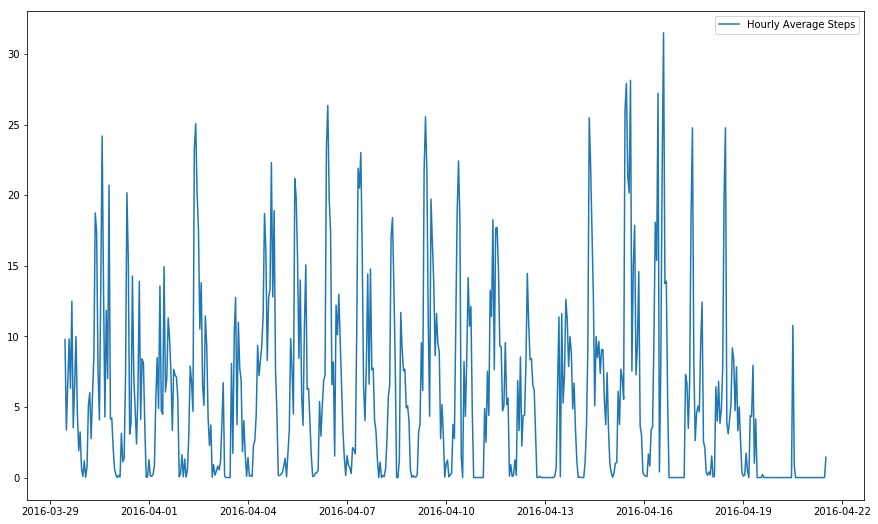

In [7]:
ts_hourly = df['Steps'].resample(rule="H").mean()
plt.plot(ts_hourly, label = "Hourly Average Steps")
plt.legend()

### How do the 15-minute average activities look like?

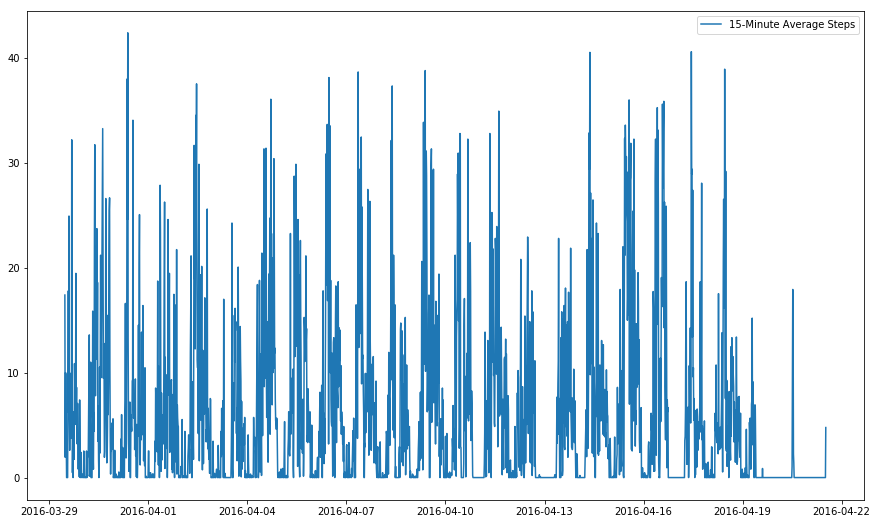

In [8]:
ts_quarterly = df['Steps'].resample('15T').mean()
plt.plot(ts_quarterly, label = "15-Minute Average Steps")
plt.legend()

### In terms of steps, how do the average activities change in a day (0:00-23:00)?

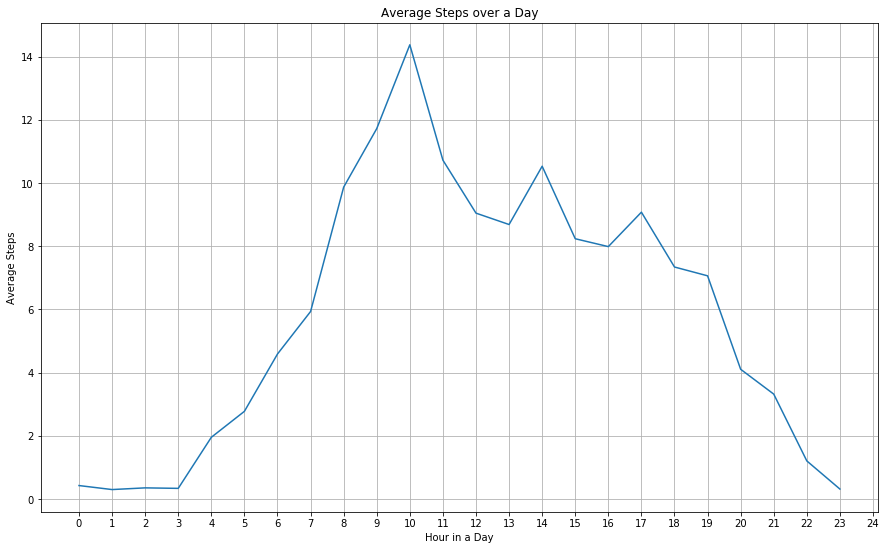

In [9]:
by_time = df[['Steps', 'Hour']].groupby('Hour').mean()
plt.plot(by_time)
plt.title("Average Steps over a Day")
plt.xticks(np.arange(25))
plt.xlabel("Hour in a Day")
plt.ylabel("Average Steps")
plt.grid()

### OK, how does the boxplot of all the steps look like over all the hours in a day?

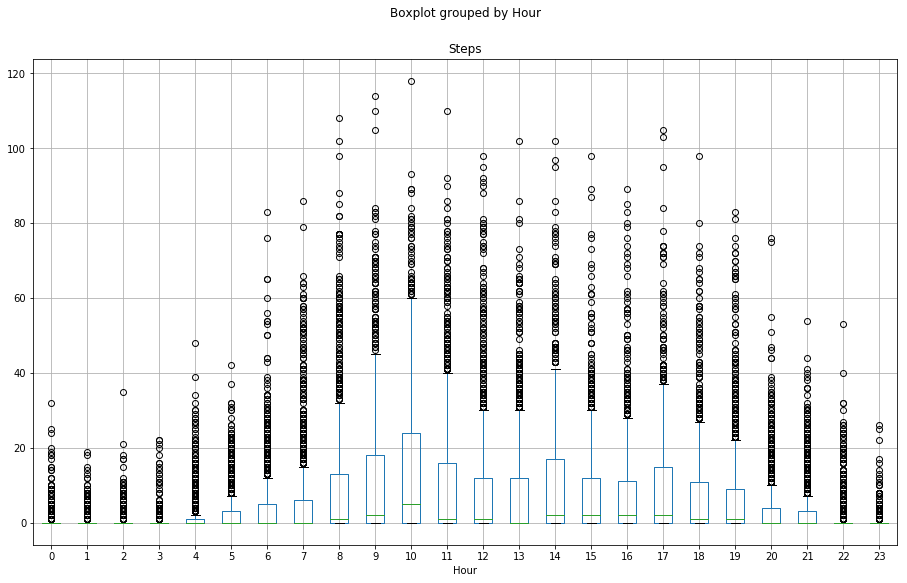

In [10]:
df.boxplot(column = 'Steps', by = 'Hour', figsize = (15, 9))

### How do the activities in hours look like if we factor the data by the wearSens field?

WearSens Specification:
- 0 = Non-Wear
- 1 = Wear
- 2 = Calibrating (the wear sensor calibrates for 10 seconds after it is unplugged from a docking station)
- 3 = Device is plugged into docking station

In [11]:
box_data = df[['Steps', 'Hour', 'WearSens']]

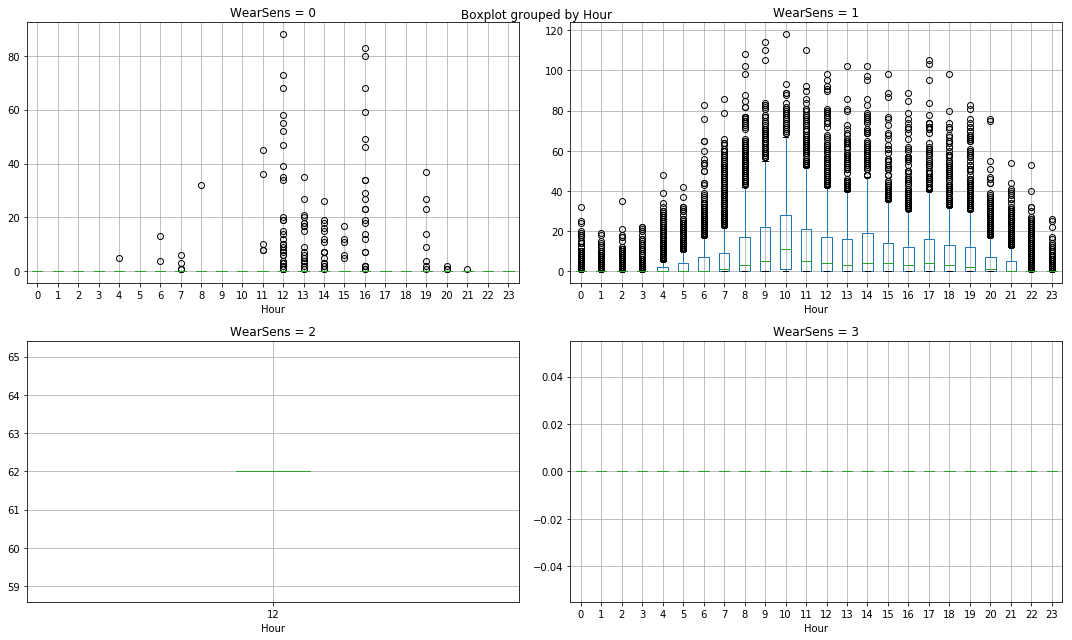

In [12]:
fig = plt.figure(figsize = (15, 9))
ax1 = fig.add_subplot(2, 2, 1)
box_data[box_data['WearSens'] == 0].boxplot(column = 'Steps', by = 'Hour', ax = ax1)
ax1.set_title("WearSens = 0")
ax2 = fig.add_subplot(2, 2, 2)
box_data[box_data['WearSens'] == 1].boxplot(column = 'Steps', by = 'Hour', ax = ax2)
ax3 = fig.add_subplot(2, 2, 3)
box_data[box_data['WearSens'] == 2].boxplot(column = 'Steps', by = 'Hour', ax = ax3)
ax4 = fig.add_subplot(2, 2, 4)
box_data[box_data['WearSens'] == 3].boxplot(column = 'Steps', by = 'Hour', ax = ax4)
ax2.set_title("WearSens = 1")
ax3.set_title("WearSens = 2")
ax4.set_title("WearSens = 3")
plt.tight_layout()

### OK, for the most active hour at 10:00, how did the subject move in each minute when wearing the monitor?

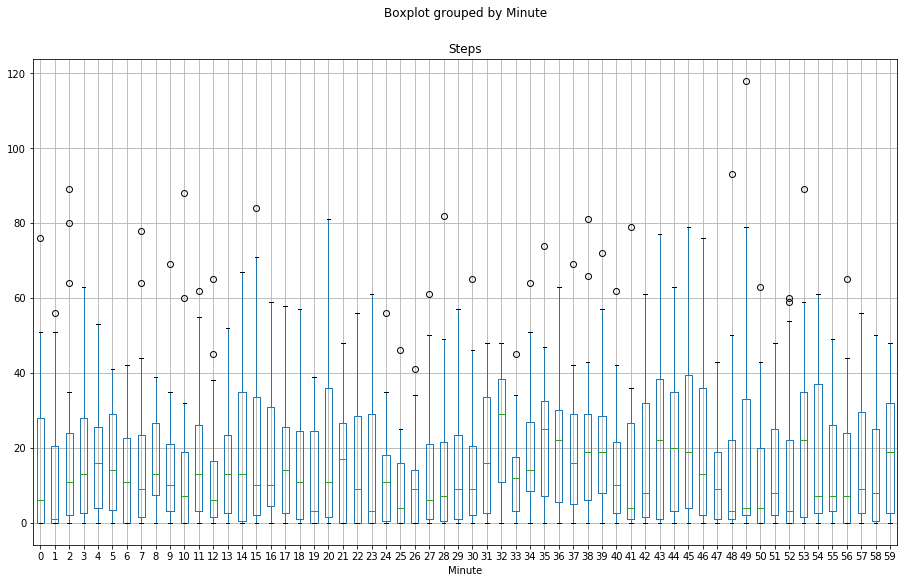

In [13]:
hour10 = df[df['Hour'] == 10]
hour10_wear1 = hour10[hour10.WearSens  == 1]
hour10_wear1.boxplot(column = "Steps", by = "Minute", figsize = (15, 9))

### Over the total 33205-minute records, how long did the subject wear the monitor?

In [14]:
df['WearSens'].value_counts()

1    27139
0     4679
3     1386
2        1
Name: WearSens, dtype: int64

#### The subject wore the monitor most of the time: 27139/33205.

### For each hour, what is the percentage of no activities (0 steps) on average?

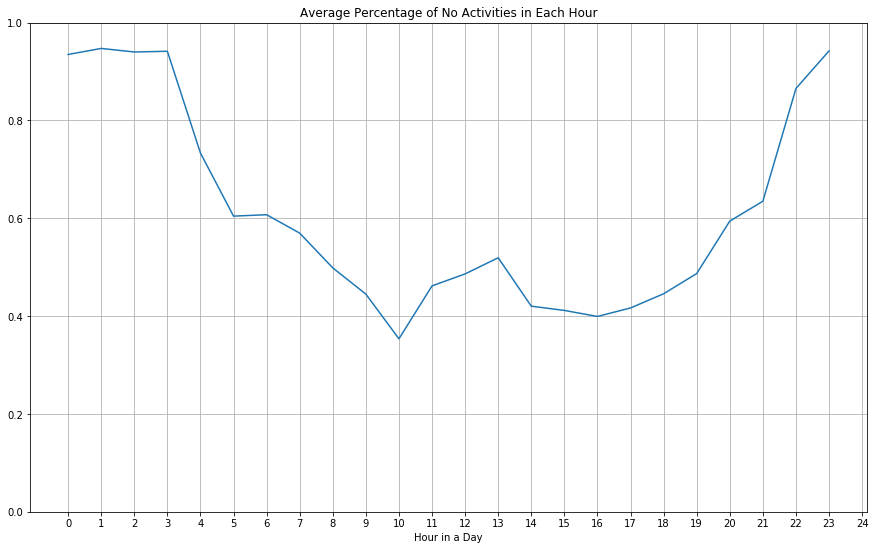

In [15]:
zero_perc = lambda g: (g == 0).sum() / g.shape[0]

plt.plot(df[['Steps', 'Hour']].groupby("Hour").agg(zero_perc))
plt.ylim((0,1))
plt.title("Average Percentage of No Activities in Each Hour")
plt.xlabel("Hour in a Day")
plt.xticks(np.arange(25))
plt.grid()

### How do the activity patterns look like in terms of weekdays?

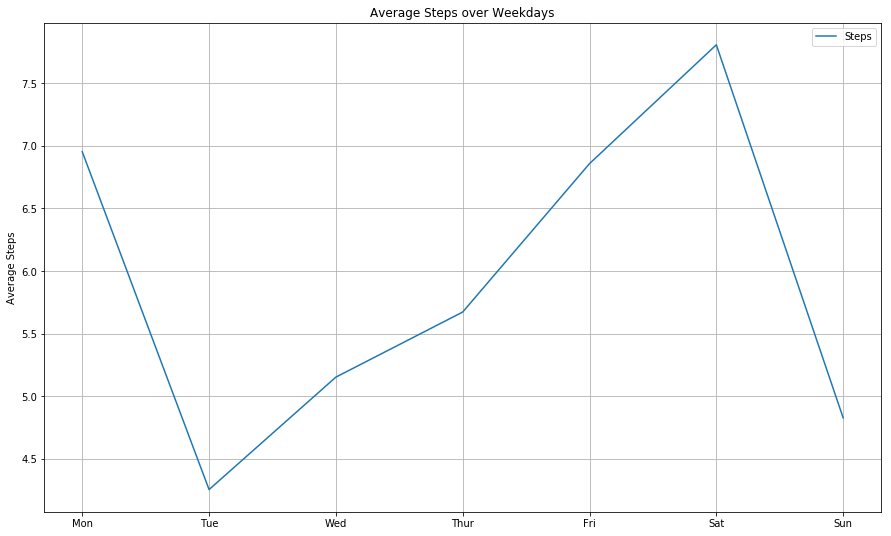

In [16]:
by_weekday = df[['Steps']].groupby(df.index.dayofweek).mean()
xticks = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.index = xticks
by_weekday.plot()
plt.xticks([0,1,2,3,4,5,6], xticks)
plt.ylabel("Average Steps")
plt.title("Average Steps over Weekdays")
plt.grid()

### How do the activity patterns look like in weekdays and weekend?

In [17]:
weekend = np.where(df.index.weekday < 5, 'weekday', 'weekend')
by_time = df.groupby([weekend, 'Hour']).mean()

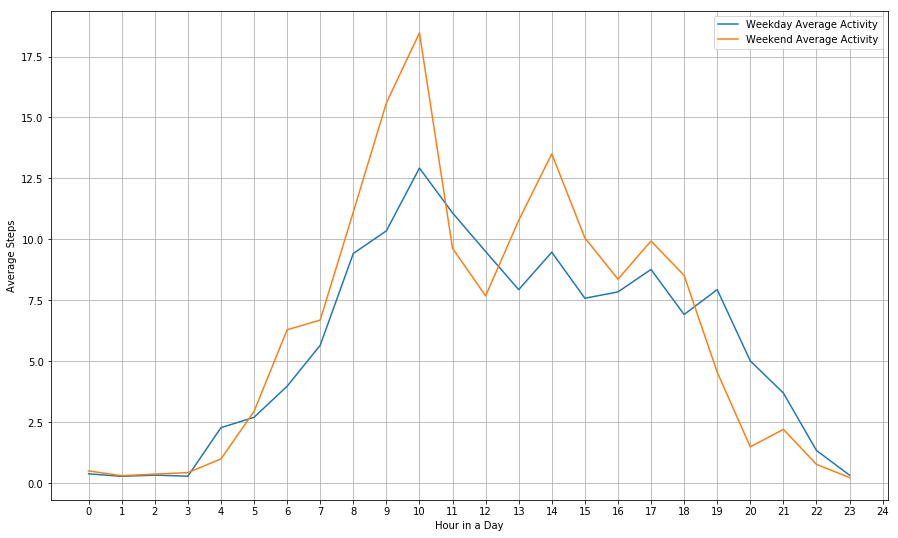

In [18]:
by_time.loc['weekday']['Steps'].plot(label = 'Weekday Average Activity')
by_time.loc['weekend']['Steps'].plot(label = "Weekend Average Activity")
plt.legend()
plt.xlabel("Hour in a Day")
plt.ylabel("Average Steps")
plt.xticks(np.arange(25))
plt.grid()